In [1]:
import pandas as pd
from plotting_utils import *
from plotting_ACs import *
from clustering_utils import *

Load data and plot BIC curves

In [2]:
gmm_results = pd.read_pickle('Data/ACs/Dataframes/gmm_pcaColor_3Components_features.pkl')
data = pd.read_pickle('Data/ACs/Dataframes/control_data_full.pkl')
assert len(data) == len(gmm_results['Predictions'].iloc[0])
final_results = bayes_factor(gmm_results)

In [3]:
final_results

,Seed,Covariance type,Nb components,Predictions,Bayes Factor
0,16,diag,25,"[10, 23, 23, 10, 23, 24, 23, 23, 23, 23, 8, 24...","[17014.308728263946, 17463.370895846107, 7220...."
1,17,full,5,"[2, 4, 4, 2, 4, 2, 4, 4, 4, 4, 1, 2, 4, 4, 4, ...","[9156.515603793901, 4777.526032986119, 1767.92..."
2,4,tied,31,"[4, 13, 13, 14, 13, 10, 13, 13, 23, 13, 27, 10...","[227.30036058428232, 2127.869058837474, 1571.4..."
3,16,spherical,38,"[31, 23, 23, 31, 23, 24, 23, 23, 33, 23, 8, 24...","[11087.579866470303, 12382.418869201792, 5613...."


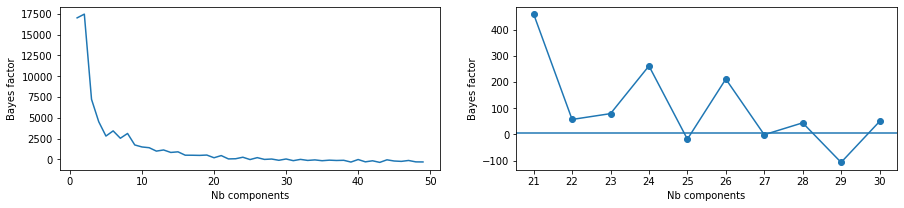

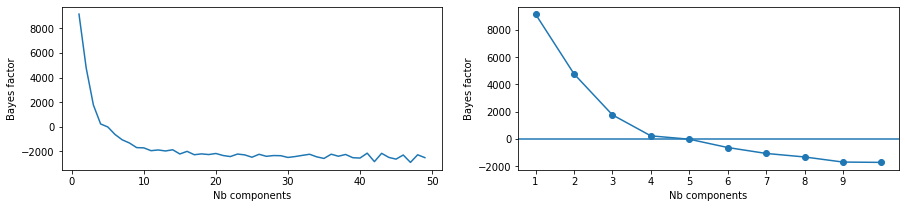

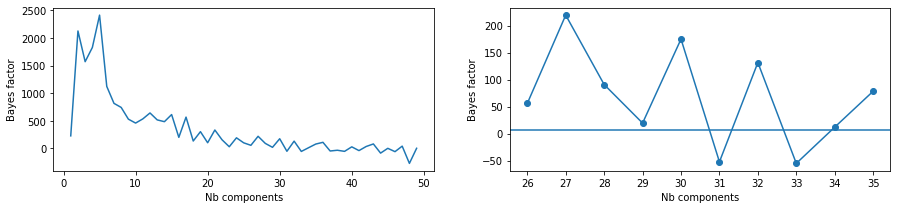

In [4]:
# Plot Bayes Factor

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.xlabel('Nb components')
plt.ylabel('Bayes factor')
plt.plot(np.arange(1,50), final_results['Bayes Factor'].iloc[0])
plt.subplot(1,2,2)
plt.xlabel('Nb components')
plt.ylabel('Bayes factor')
plt.plot(np.arange(1,50)[20:30], final_results['Bayes Factor'].iloc[0][20:30], 'o-')
plt.axhline(6)
plt.xticks(np.arange(21,31))
plt.show()

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.xlabel('Nb components')
plt.ylabel('Bayes factor')
plt.plot(np.arange(1,50), final_results['Bayes Factor'].iloc[1])
plt.subplot(1,2,2)
plt.xlabel('Nb components')
plt.ylabel('Bayes factor')
plt.plot(np.arange(1,50)[0:10], final_results['Bayes Factor'].iloc[1][0:10], 'o-')
plt.axhline(6)
plt.xticks(np.arange(1,10))
plt.show()

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.xlabel('Nb components')
plt.ylabel('Bayes factor')
plt.plot(np.arange(1,50), final_results['Bayes Factor'].iloc[2])
plt.subplot(1,2,2)
plt.xlabel('Nb components')
plt.ylabel('Bayes factor')
plt.plot(np.arange(1,50)[25:35], final_results['Bayes Factor'].iloc[2][25:35], 'o-')
plt.axhline(6)
plt.xticks(np.arange(26,36))
plt.show()

Permute cluster IDs

In [5]:
data['cluster ID (tied)'] = final_results['Predictions'].loc[final_results['Covariance type'] == 'tied'].to_numpy()[0]
data['cluster ID (tied)'] = permute_clusterIDs(data, 'cluster ID (tied)')

data['cluster ID (full)'] = final_results['Predictions'].loc[final_results['Covariance type'] == 'full'].to_numpy()[0]
data['cluster ID (full)'] = permute_clusterIDs(data, 'cluster ID (full)')

data['cluster ID (diag)'] = final_results['Predictions'].loc[final_results['Covariance type'] == 'diag'].to_numpy()[0]
data['cluster ID (diag)'] = permute_clusterIDs(data, 'cluster ID (diag)')

Plot tied clustering

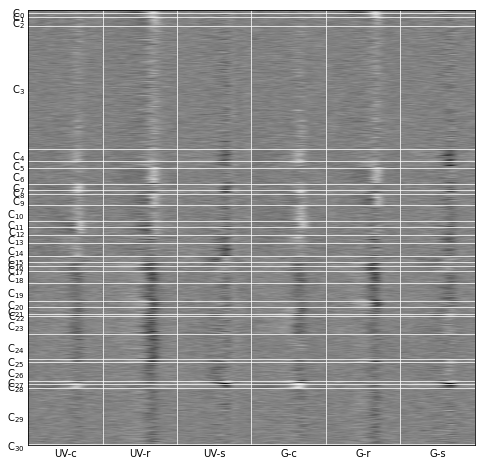

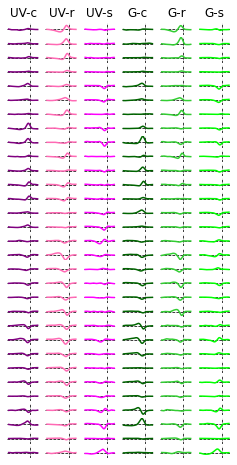

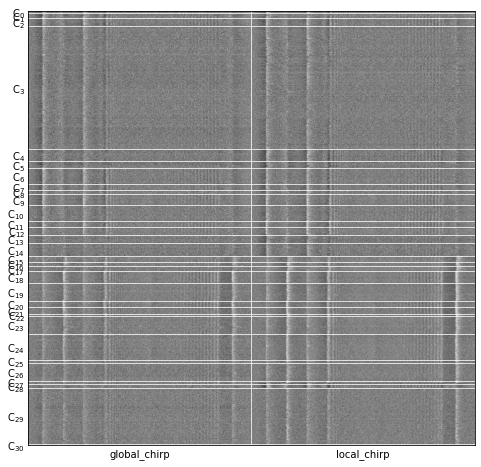

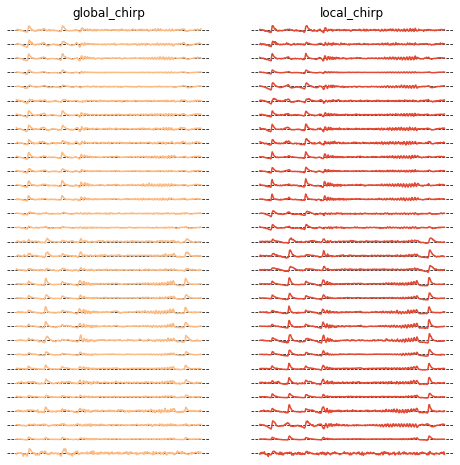

In [6]:
name = 'cluster ID (tied)'

plot_Kernels(data, name)
plot_Chirp(data, name)

Plot full clustering

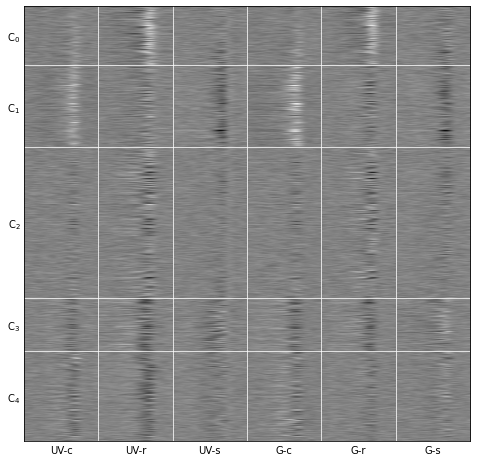

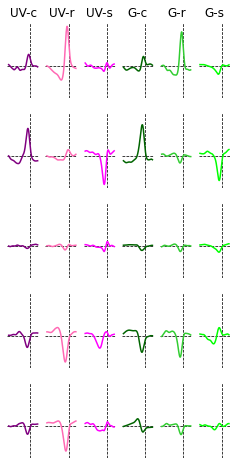

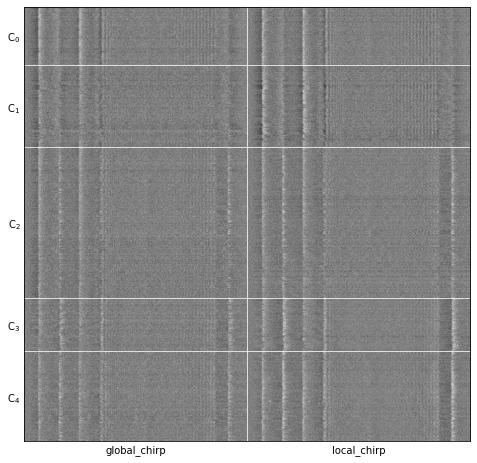

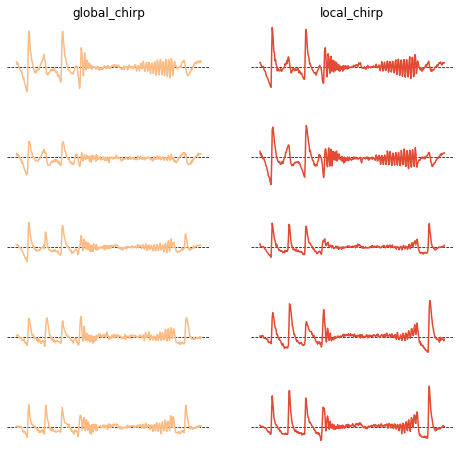

In [7]:
name = 'cluster ID (full)'

plot_Kernels(data, name)
plot_Chirp(data, name)

Plot diagonal clustering

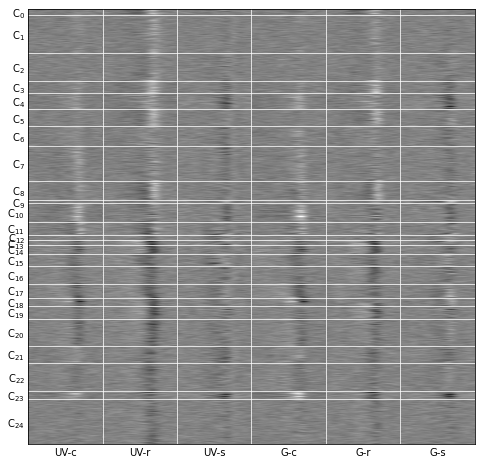

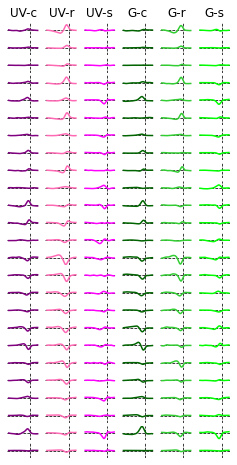

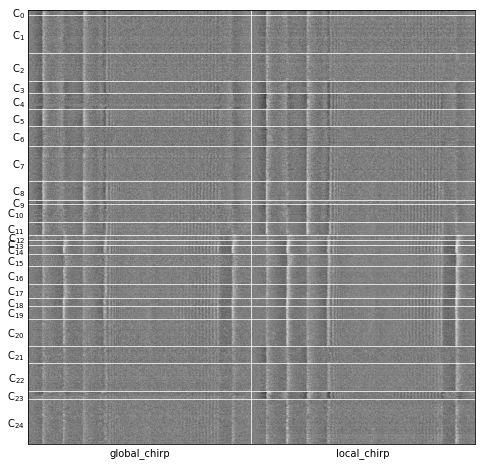

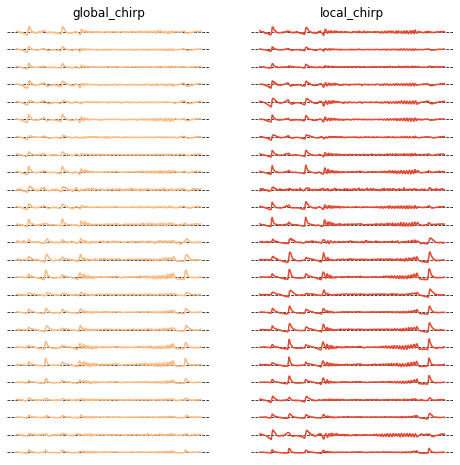

In [8]:
name = 'cluster ID (diag)'

plot_Kernels(data, name)
plot_Chirp(data, name)

Remove ROIs from field that had very uncorrelated flicker stimulus

In [9]:
import datetime

In [10]:
to_drop = data[(data['date'] == datetime.date(2021,10,19)) & 
               (data['exp_num'] == 1) & 
               (data['field_id'] == 2)].index

data.drop(to_drop, inplace = True)
data = data.reset_index(drop = True)

In [11]:
data[(data['date'] == datetime.date(2021,10,19)) & (data['exp_num'] == 1) &  (data['field_id'] == 2)]

,date,exp_num,field_id,roi,uv_center,uv_ring,uv_surround,green_center,green_ring,green_surround,...,time_bin_global_chirp,global_chirp,time_bin_local_chirp,local_chirp,field,eye,mouse,cluster ID (tied),cluster ID (full),cluster ID (diag)


Average across ROIs

In [12]:
flicker_responses = cluster_average(data, 'cluster ID (diag)', 'response_trace_flicker')
global_chirp = cluster_average(data, 'cluster ID (diag)', 'global_chirp')
local_chirp = cluster_average(data, 'cluster ID (diag)', 'local_chirp')

Plot clusters

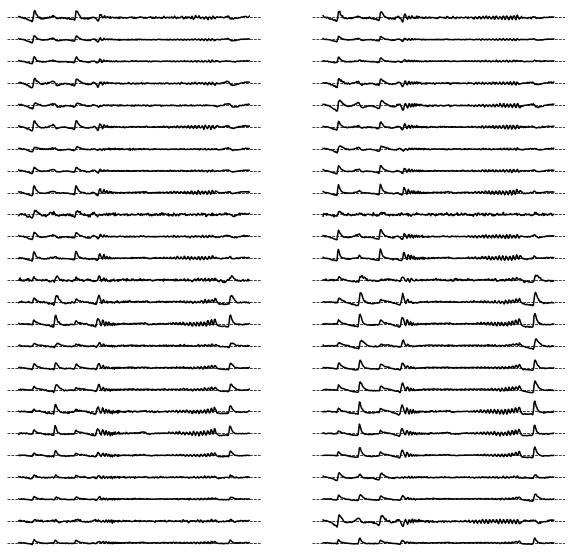

In [13]:
nb_clusters = local_chirp.shape[0]
fig, ax = plt.subplots(nb_clusters, 2, sharex='all', sharey='all', figsize=(10,10))
for current_cluster_ID in range(nb_clusters):
    my_ax = ax[current_cluster_ID, 0]
    my_ax.axis('off')
    my_ax.axhline(0, color = 'black', linestyle = 'dashed', linewidth = 0.75)
    my_ax.plot(global_chirp[current_cluster_ID,:], color = 'black', linewidth = 1.5)

    my_ax = ax[current_cluster_ID, 1]
    my_ax.axis('off')
    my_ax.axhline(0, color = 'black', linestyle = 'dashed', linewidth = 0.75)
    my_ax.plot(local_chirp[current_cluster_ID,:], color = 'black', linewidth = 1.5)
plt.show()

Save arrays

In [14]:
#np.save('Data/ACs/Cluster Averages/flicker_avrg.npy', flicker_responses)
#np.save('Data/ACs/Cluster Averages/global_chirp_avrg.npy', global_chirp)
#np.save('Data/ACs/Cluster Averages/local_chirp_avrg.npy', local_chirp)